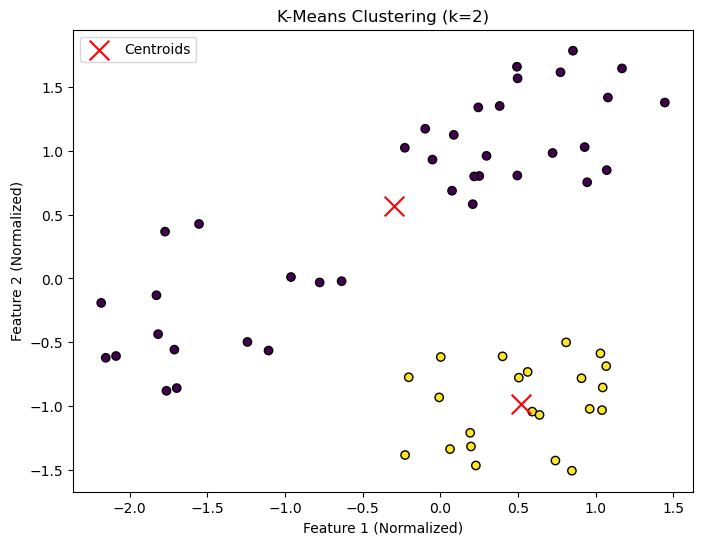

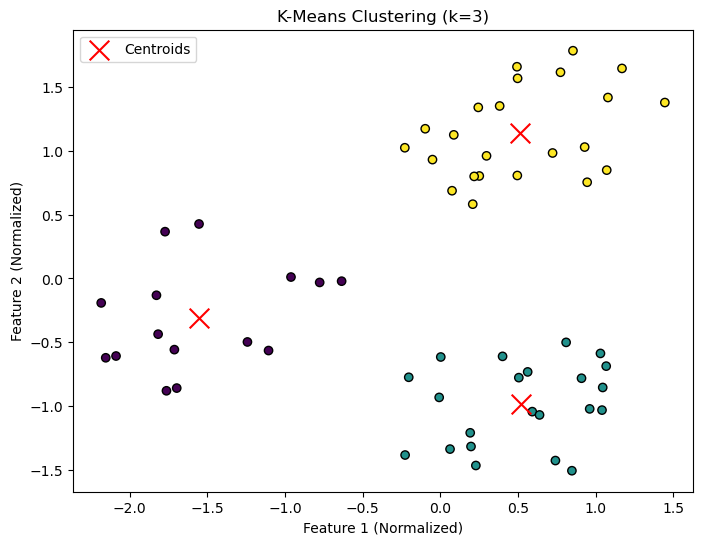

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load dataset
data_path = "kmeans_data.csv"
df = pd.read_csv(data_path)

In [11]:
# Convert all columns to numeric (if any non-numeric values exist, they will be converted to NaN)
df = df.apply(pd.to_numeric, errors='coerce')

In [13]:
# Drop rows with NaN values (if any)
df = df.dropna()

In [15]:
# Convert DataFrame to NumPy array
X = df.to_numpy()

In [17]:
# Normalize the dataset
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [19]:
# K-means clustering function
def k_means(X, k, max_iters=100):
    np.random.seed(42)  # For reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

#### Run K-means for k=2 and k=3

In [28]:
labels_2, centroids_2 = k_means(X, k=2)
labels_3, centroids_3 = k_means(X, k=3)

#### Plot results for k=2

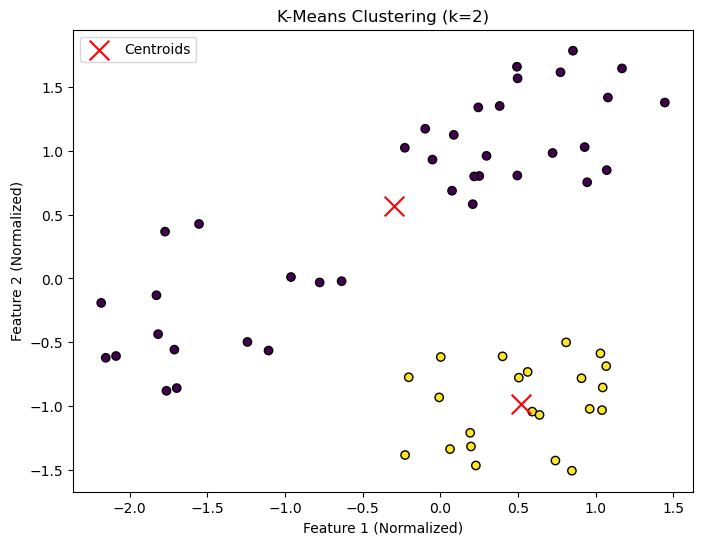

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=2)')
plt.legend()
plt.show()

#### Plot results for k=3

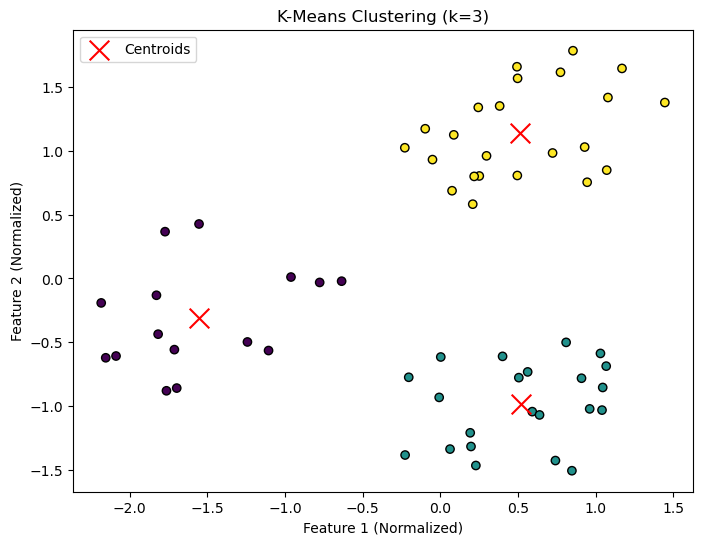

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_3, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()